###### U20EC147
# Assignment 2
### Aim : Design a CNN based classifier to classify the images in relative sports.

In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/kaggle/input/sports-classification/sports.csv')
df_train = df[df['data set'] == 'train']
df_test = df[df['data set'] == 'test']
df_valid = df[df['data set'] == 'valid']
df_test

,class id,filepaths,labels,data set
13493,0,test/air hockey/1.jpg,air hockey,test
13494,0,test/air hockey/2.jpg,air hockey,test
13495,0,test/air hockey/3.jpg,air hockey,test
13496,0,test/air hockey/4.jpg,air hockey,test
13497,0,test/air hockey/5.jpg,air hockey,test
...,...,...,...,...
13988,99,test/wingsuit flying/1.jpg,wingsuit flying,test
13989,99,test/wingsuit flying/2.jpg,wingsuit flying,test
13990,99,test/wingsuit flying/3.jpg,wingsuit flying,test
13991,99,test/wingsuit flying/4.jpg,wingsuit flying,test


(224, 224, 3)

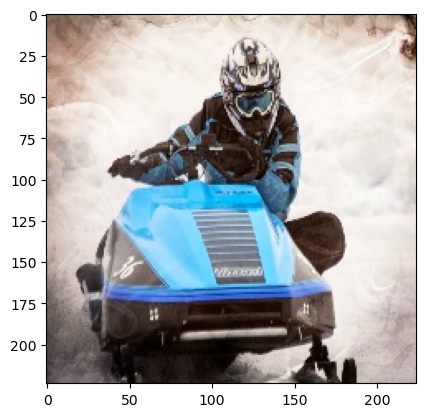

In [ ]:
root = '/kaggle/input/sports-classification/'
img = cv2.imread(root + df_test['filepaths'].iloc[-100])
plt.imshow(img)
img.shape

In [ ]:
total_labels = pd.unique(df['labels'])
total_labels, len(total_labels)

(array(['air hockey', 'ampute football', 'archery', 'arm wrestling',
        'axe throwing', 'balance beam', 'barell racing', 'baseball',
        'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx',
        'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping',
        'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket',
        'croquet', 'curling', 'disc golf', 'fencing', 'field hockey',
        'figure skating men', 'figure skating pairs',
        'figure skating women', 'fly fishing', 'football',
        'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf',
        'hammer throw', 'hang gliding', 'harness racing', 'high jump',
        'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching',
        'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting',
        'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse',
        'log rolling', 'luge', 'motorcycle racing', 'mushing',
        'nascar racing', 'olympic wrestling', 'p

In [ ]:
root = '/kaggle/input/sports-classification/'
train_images = []
train_labels = []
n = len(df_train)
for i in range (n):
    img = cv2.imread(root + df_train['filepaths'].iloc[i])
    if img is not None:
        train_images.append(img)
        train_labels.append(df_train['class id'].iloc[i])
train_images = np.concatenate(train_images).reshape(-1,224,224,3)
train_labels = np.array(train_labels)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(100, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                  

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
422/422 [==============================] - 16s 36ms/step - loss: 1060.4773 - accuracy: 0.0765
Epoch 2/10
422/422 [==============================] - 15s 36ms/step - loss: 242.0924 - accuracy: 0.4738
Epoch 3/10
422/422 [==============================] - 15s 36ms/step - loss: 119.7941 - accuracy: 0.7608
Epoch 4/10
422/422 [==============================] - 15s 36ms/step - loss: 98.2075 - accuracy: 0.8518
Epoch 5/10
422/422 [==============================] - 15s 36ms/step - loss: 82.7527 - accuracy: 0.8996
Epoch 6/10
422/422 [==============================] - 15s 36ms/step - loss: 89.7443 - accuracy: 0.9250
Epoch 7/10
422/422 [==============================] - 15s 36ms/step - loss: 84.7935 - accuracy: 0.9380
Epoch 8/10
422/422 [==============================] - 15s 36ms/step - loss: 93.9867 - accuracy: 0.9485
Epoch 9/10
422/422 [==============================] - 15s 36ms/step - loss: 84.8257 - accuracy: 0.9555
Epoch 10/10
422/422 [==============================] - 15s 36ms/step 